## Setup

# Mental Health in the Tech Industry
TODO meaningful text
years 2016 - 2019

### Import, Style and options

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

### Database/Dataframe

In [2]:
# Establish connection to db
con = sqlite3.connect('mental_health.sqlite')
cur = con.cursor()

In [3]:
questions = pd.read_sql_query("SELECT * FROM Question", con)

In [4]:
# Select tupels of people, whose primary role in the company is IT/Tech
df = pd.read_sql_query("Select * from Answer where UserID IN (Select UserID from Answer Where QuestionID=13 and AnswerText='1')", con)

In [5]:
df.rename(columns={'SurveyID': 'Year'}, inplace = True)

### Functions

In [6]:
def get_valid_answers(question_id):
    return df[(df['QuestionID'] == question_id) & (df['AnswerText'] != '-1')]

In [7]:
def append_count_in_percent(grouped_df):
    return (grouped_df['Count'] / grouped_df['Count'].sum())*100 

In [8]:
def append_count_in_percent_by_group(grouped_df, group_by_value):
    return (grouped_df['Count'] / grouped_df.groupby(group_by_value)['Count'].transform('sum'))*100

## Question catalogue

In [9]:
questions

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


In [10]:
# Q1: "What is your age?"
q1 = get_valid_answers(1)
q1.rename(columns={'AnswerText': 'Age'}, inplace = True)

In [11]:
# Q2: "What is your gender?"
q2 = get_valid_answers(2)
q2.rename(columns={'AnswerText': 'Gender'}, inplace = True)

In [12]:
# Q3: "What country do you live in?"
q3 = get_valid_answers(3)
q3.rename(columns={'AnswerText': 'Country'}, inplace = True)

In [13]:
# Q5: "Are you self-employed?"
q5 = get_valid_answers(5)
q5.rename(columns={'AnswerText': 'Self_employed'}, inplace = True)

In [14]:
# Q10: "Does your employer provide mental health benefits as part of healthcare coverage?"
q10 = get_valid_answers(10)
q10.rename(columns={'AnswerText': 'current_healthcarecoverage'}, inplace = True)

In [15]:
# Q11: "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?"
q11 = get_valid_answers(11)
q11.rename(columns={'AnswerText': 'anonomity_for_seeking_help'}, inplace = True)


In [16]:
# Q14: "Do you know the options for mental health care available under your employer-provided health coverage?"
q14 = get_valid_answers(14)
q14.rename(columns={'AnswerText': 'knowladge_about_healthcare'}, inplace = True)


In [17]:
# Q15: "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?	"
q15 = get_valid_answers(15)
q15.rename(columns={'AnswerText': 'proactive_discussion_by_employe'}, inplace = True)

In [18]:
# Q16: "Does your employer offer resources to learn more about mental health disorders and options for seeking help?"
q16 = get_valid_answers(16)
q16.rename(columns={'AnswerText': 'provided_information_by_employe'}, inplace = True)


In [19]:
# Q17: "If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?"
q17 = get_valid_answers(17)
q17.rename(columns={'AnswerText': 'freetime_for_metalhealth_treatment'}, inplace = True)


In [20]:
# Q19: "Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?"
q19 = get_valid_answers(19)
q19.rename(columns={'AnswerText': 'discussing_mentalhealth_with_supervisor'}, inplace = True)

In [21]:
# Q20 "Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?" !!!empty df!!!
q20 = get_valid_answers(20)
q20.rename(columns={'AnswerText': 'insurance'}, inplace = True)

In [22]:
# Q22: "Do you have previous employers?" 
q22 = get_valid_answers(22)
q22.rename(columns={'AnswerText': 'previous employer'}, inplace = True)

In [23]:
# Q23: "Have your previous employers provided mental health benefits?"
q23 = get_valid_answers(23)
q23.rename(columns={'AnswerText': 'previous_employer_metalhealthprogram'}, inplace = True)

In [24]:
# Q24: "Were you aware of the options for mental health care provided by your previous employers?"
q24 = get_valid_answers(24)
q24.rename(columns={'AnswerText': 'previous_employer_metalhealthprogram_awarness'}, inplace = True)

In [25]:
# Q25: "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?"
q25 = get_valid_answers(25)
q25.rename(columns={'AnswerText': 'previous_employer_metalhealth_discussion'}, inplace = True)

In [26]:
# Q26: "Did your previous employers provide resources to learn more about mental health disorders and how to seek help?	"
q26 = get_valid_answers(26)
q26.rename(columns={'AnswerText': 'previous_employer_information_provided'}, inplace = True)

In [27]:
# Q27: "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?"
q27 = get_valid_answers(27)
q27.rename(columns={'AnswerText': 'previous_employer_anonomity'}, inplace = True)

In [28]:
# Q32: "Have you had a mental health disorder in the past?"
q32 = get_valid_answers(32)
q32.rename(columns={'AnswerText': 'Had_disorder'}, inplace = True)

In [29]:
# Q33: "Do you currently have a mental health disorder?"
q33 = get_valid_answers(33)
q33.rename(columns={'AnswerText': 'Has_disorder'}, inplace = True)

In [30]:
# Q54"Do you believe your productivity is ever affected by a mental health issue?" !!!empty dataframe!!!
q54 = get_valid_answers(54)
q54.rename(columns={'AnswerText': 'Productivity'}, inplace = True)

In [31]:
# Q48: "If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?"
q48 = get_valid_answers(48)
q48.rename(columns={'AnswerText': 'work_prductivity_by_treatment_yes'}, inplace = True)

In [32]:
# Q49: "If you have a mental health disorder, how often do you feel that it interferes with your work when not being treated effectively (i.e., when you are experiencing symptoms)?
q49 = get_valid_answers(49)
q49.rename(columns={'AnswerText': 'work_prductivity_by_treatment_no'}, inplace = True)

In [33]:
# Q115: : "If yes which condition?"

q115 = get_valid_answers(115)
q115.rename(columns={'AnswerText': 'Disorder'}, inplace = True)

In [34]:
# Q117: "Which of the following best describes your work position?"
q117 = get_valid_answers(117)
q117.rename(columns={'AnswerText': 'work_position'}, inplace = True)

In [35]:
# Q118: "Do you work remotely?"
q118 = get_valid_answers(118)
q118.rename(columns={'AnswerText': 'Remote_work'}, inplace = True)

## Descriptive statistics

### Q1: Age distribution

In [36]:
q1['Age'] = pd.to_numeric(q1['Age'])
q1.drop(q1[q1.Age == 0].index, inplace=True) # impossible value

In [37]:
q1.describe()

,Age,Year,UserID,QuestionID
count,1470.000000,1470.00000,1470.000000,1470.0
mean,34.862585,2017.44898,3223.034694,1.0
std,8.047605,0.98376,686.220615,0.0
min,19.000000,2016.00000,1265.000000,1.0
25%,29.000000,2017.00000,2844.250000,1.0
50%,34.000000,2017.00000,3318.500000,1.0
75%,40.000000,2018.00000,3763.750000,1.0
max,66.000000,2019.00000,4218.000000,1.0


In [38]:
# Group and count by age
q1_by_age = q1.groupby('Age').size().reset_index(name='Count')
q1_by_age['%'] = append_count_in_percent(q1_by_age)

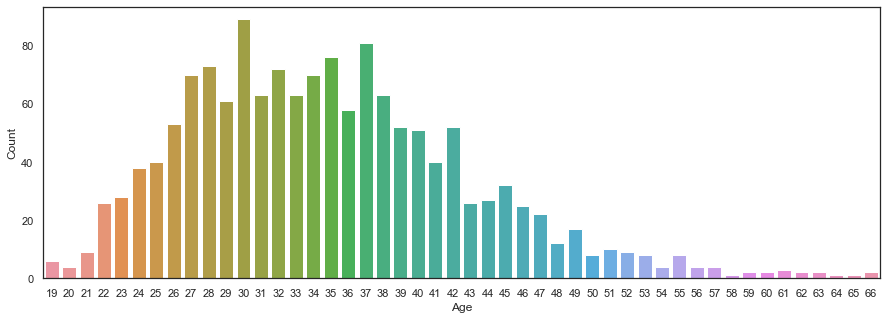

In [39]:
# Age distribution overall, visualized as bar plot
plt.subplots(figsize=(15, 5))
age_barplot = sns.barplot(x = 'Age', y = 'Count', data = q1_by_age)

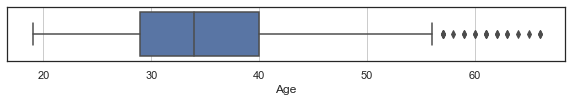

In [40]:
# Age distribution overall, visualized as box plot
plt.subplots(figsize=(10, 1))
age_boxplot = sns.boxplot(x=q1.Age)
age_boxplot.xaxis.grid(True)

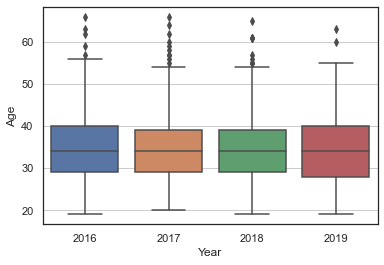

In [41]:
# Age distribution by year, visualized as box plot
age_boxplot_2 = sns.boxplot(x=q1.Year, y=q1.Age)
age_boxplot_2.yaxis.grid(True)

### Q2: Gender distribution

In [42]:
# capitalize answers to group them properly
q2.Gender = q2.Gender.str.capitalize() 

In [43]:
# Change non-"Male" and non-"Female" to "Other"
q2['Gender'] = np.where(((q2.Gender != 'Male') & (q2.Gender != 'Female')), 'Other', q2.Gender)

In [44]:
# Group and count answers by year
q2_by_year = q2.groupby('Year').size().reset_index(name='Count')
q2_by_year['%'] = append_count_in_percent(q2_by_year)
q2_by_year

,Year,Count,%
0,2016,246,16.860864
1,2017,591,40.507197
2,2018,345,23.646333
3,2019,277,18.985607


In [45]:
# Group and count answers by gender
q2_by_gender = q2.groupby('Gender').size().reset_index(name='Count') 
q2_by_gender['%'] = append_count_in_percent(q2_by_gender)
q2_by_gender

,Gender,Count,%
0,Female,401,27.484578
1,Male,999,68.471556
2,Other,59,4.043866


In [46]:
# Group and count answers by year & gender
q2_by_gender_and_year = q2.groupby(['Gender', 'Year']).size().reset_index(name='Count') 
q2_by_gender_and_year['%'] = append_count_in_percent_by_group(q2_by_gender_and_year, 'Year')
q2_by_gender_and_year

,Gender,Year,Count,%
0,Female,2016,60,24.390244
1,Female,2017,166,28.087986
2,Female,2018,102,29.565217
3,Female,2019,73,26.353791
4,Male,2016,182,73.983740
5,Male,2017,407,68.866328
6,Male,2018,222,64.347826
7,Male,2019,188,67.870036
8,Other,2016,4,1.626016
9,Other,2017,18,3.045685


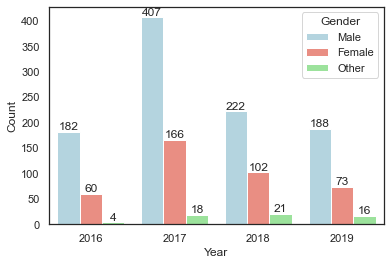

In [47]:
# Gender distribution by year, visualized
gender_barplot = sns.barplot(x = 'Year', y = 'Count', hue = 'Gender', data = q2_by_gender_and_year, \
    hue_order=['Male', 'Female', 'Other'], palette=['lightblue', 'salmon', 'lightgreen'])

# add labels to bars
for container in gender_barplot.containers:
    gender_barplot.bar_label(container)

### Q3: Origin distribution

In [48]:
# Participation by country
q3_by_country = q3.groupby('Country').size().reset_index(name='Count')
q3_by_country['%'] = append_count_in_percent(q3_by_country)
print('Number of countries: ' + str(len(q3_by_country.index)))

Number of countries: 55


In [49]:
# Top 10 country participation
q3_by_country_top_10 = q3_by_country.nlargest(10, 'Count')
q3_by_country_top_10.sort_values('Count', ascending = False)

,Country,Count,%
53,United States of America,1010,68.660775
52,United Kingdom,123,8.361659
8,Canada,37,2.515296
18,Germany,34,2.311353
24,India,25,1.699524
33,Netherlands,24,1.631543
17,France,20,1.359619
6,Brazil,18,1.223657
39,Portugal,18,1.223657
47,Spain,16,1.087695


### Q5: Self-employment ratio

In [50]:
# Change: 1 -> Yes, 0 -> No
q5['Self_employed'] = np.where((q5.Self_employed == '1'), 'Yes', q5.Self_employed)
q5['Self_employed'] = np.where((q5.Self_employed == '0'), 'No', q5.Self_employed)

In [51]:
# Group and count by answer
q5_by_answer = q5.groupby('Self_employed').size().reset_index(name='Count')
q5_by_answer['%'] = append_count_in_percent(q5_by_answer)
q5_by_answer

,Self_employed,Count,%
0,No,1471,100.0


## Hypotheses

### Die Häufigkeit psychischer Erkrankungen nimmt jährlich zu

In [52]:
# Standardize answers
q33['Has_disorder'] = np.where((q33.Has_disorder == 'Maybe'), 'Possibly', q33.Has_disorder)

In [53]:
# Group and count by Answer and Year
has_disorder_by_year = q33.groupby(['Has_disorder', 'Year']).size().reset_index(name='Count')
has_disorder_by_year['%'] = append_count_in_percent_by_group(has_disorder_by_year, 'Year')
has_disorder_by_year

,Has_disorder,Year,Count,%
0,Don't Know,2017,55,9.243697
1,Don't Know,2018,23,6.647399
2,Don't Know,2019,20,7.092199
3,No,2016,95,38.306452
4,No,2017,172,28.907563
5,No,2018,95,27.456647
6,No,2019,83,29.432624
7,Possibly,2016,56,22.580645
8,Possibly,2017,115,19.327731
9,Possibly,2018,71,20.520231


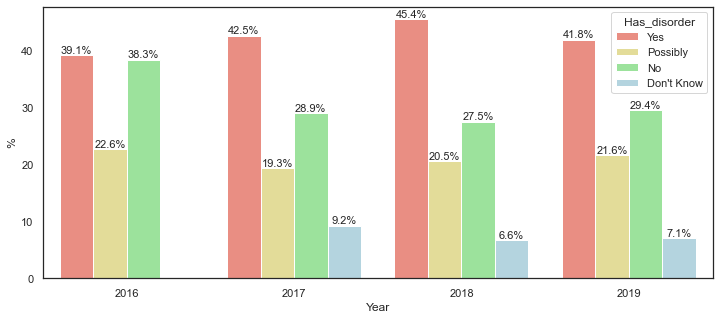

In [54]:
# Currently affected by a mental disorder, visualized
plt.subplots(figsize=(12, 5))
has_disorder_barplot = sns.barplot(x = 'Year', y = '%', hue = 'Has_disorder', data = has_disorder_by_year, \
    hue_order=['Yes', 'Possibly', 'No', 'Don\'t Know'], palette=['salmon', 'khaki', 'lightgreen','lightblue'])

for container in has_disorder_barplot.containers:
    has_disorder_barplot.bar_label(container, fmt='%.1f%%', fontsize=11)

### Frauen sind häufiger von psychischen Erkrankungen betroffen als Männer

In [55]:
# Mental disorder by gender
q2_q33 = pd.merge(q2, q33, on='UserID', how='inner')
q2_q33.drop(q2_q33[q2_q33.Gender == 'Other'].index, inplace=True)
disorder_by_gender = q2_q33.groupby(['Gender', 'Has_disorder']).size().reset_index(name='Count')
disorder_by_gender['%'] = append_count_in_percent_by_group(disorder_by_gender, 'Gender')
disorder_by_gender

,Gender,Has_disorder,Count,%
0,Female,Don't Know,20,4.987531
1,Female,No,91,22.693267
2,Female,Possibly,72,17.955112
3,Female,Yes,218,54.364090
4,Male,Don't Know,75,7.507508
5,Male,No,341,34.134134
6,Male,Possibly,217,21.721722
7,Male,Yes,366,36.636637


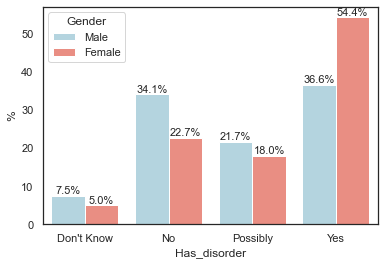

In [56]:
# Status of mental disorder by gender, visualized
gender_disorder_barplot = sns.barplot(x = 'Has_disorder', y = '%', hue = 'Gender', data = disorder_by_gender, \
    hue_order=['Male', 'Female'], palette=['lightblue', 'salmon'])

for container in gender_disorder_barplot.containers:
   gender_disorder_barplot.bar_label(container, fmt='%.1f%%', fontsize=11)

### Respondents from the tech (exclusivly) mainly suffer from phobias and burn out


In [57]:
# Groupby Disorder
q115_by_disorder = q115.groupby('Disorder').size().reset_index(name='Count')

In [58]:
# Sort values by Count and drop a answercount from 3 or less
q115_by_disorder_sorted = q115_by_disorder.sort_values(by=['Count'], ascending=False)
q115_by_disorder_sorted1 = q115_by_disorder_sorted[q115_by_disorder_sorted['Count'] > 3]

q115_by_disorder_sorted1

,Disorder,Count
6,"Mood Disorder (Depression, Bipolar Disorder, etc)",69
1,"Anxiety Disorder (Generalized, Social, Phobia, etc)",60
3,Attention Deficit Hyperactivity Disorder,19
9,Post-traumatic Stress Disorder,13
10,Stress Response Syndromes,7
11,Substance Use Disorder,6
7,Obsessive-Compulsive Disorder,5


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mood Disorder (Depression, Bipolar Disorder, etc)'),
  Text(1, 0, 'Anxiety Disorder (Generalized, Social, Phobia, etc)'),
  Text(2, 0, 'Attention Deficit Hyperactivity Disorder'),
  Text(3, 0, 'Post-traumatic Stress Disorder'),
  Text(4, 0, 'Stress Response Syndromes'),
  Text(5, 0, 'Substance Use Disorder'),
  Text(6, 0, 'Obsessive-Compulsive Disorder')])

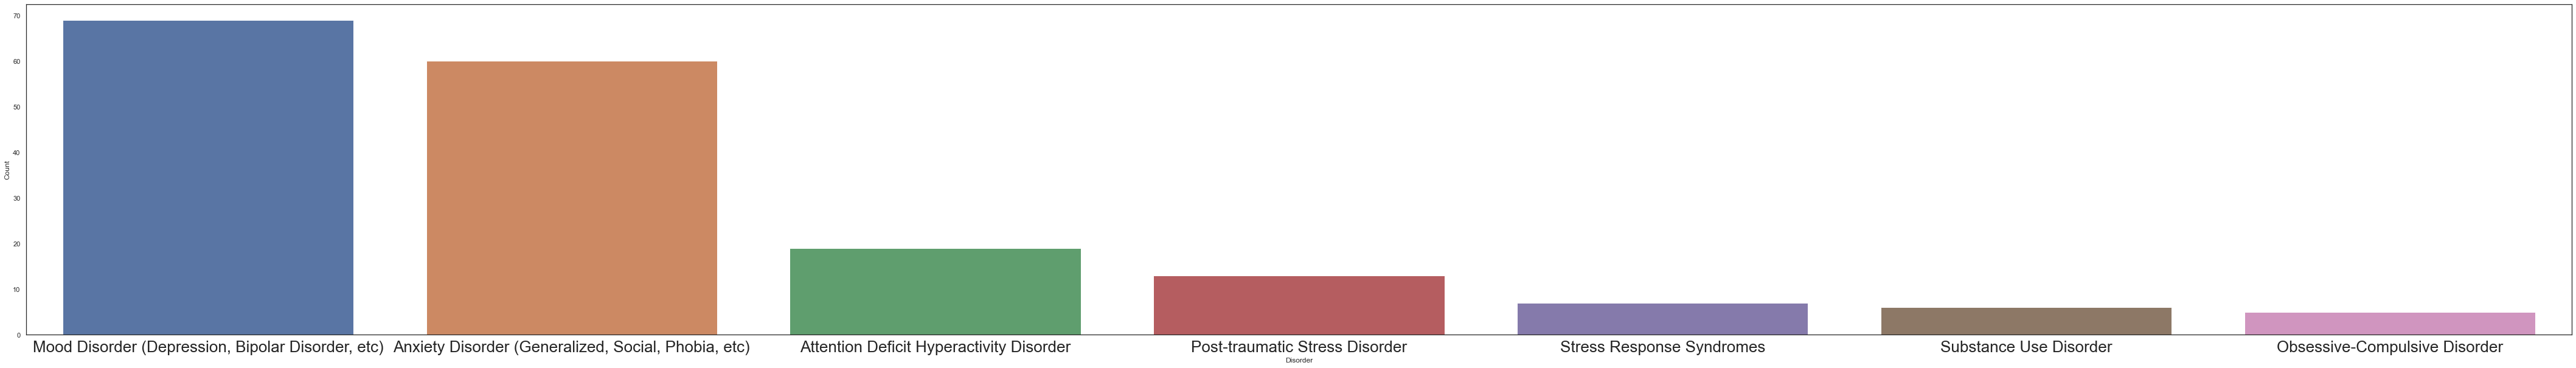

In [59]:
# Disorder distribution overall, visualized as bar plot (Tipp: open seperatly for better visibility)
plt.subplots(figsize=(75, 10))
disorder_barplot = sns.barplot(x = 'Disorder', y = 'Count', data = q115_by_disorder_sorted1)
plt.xticks(fontsize=26)


### Does a good healthcare network (in a company) have a positive effect on employees?

Wie kann ich das besser mergen?? Problem: mehrere aufeinmal mergen führt immer zu Fehlern. Unten habe ich mich einfach drum herum gearbeitet. Funktioniert ist aber unschön.
Die Copy habe ich nun nach den Merges gemacht, so kann man die inzelnen merges verwenden wenn man nöchte, ohne dass ich sie noch verändert habe

In [60]:
# Zusammenführen der Fragen 10, 11, 14, 15, 16, 17, die alle Abfragen wie sehr sich der Arbeitgeber beteiligt oder zulässt das Mental Health diskutiert wird
q10_q11 = pd.merge(q10, q11, on='UserID', how='inner')
q10_q11_q14 = pd.merge(q10_q11, q14, on='UserID', how='inner')
q10_q11_q14_15 = pd.merge(q10_q11_q14, q15, on='UserID', how='inner')
q10_q11_q14_15_16 = pd.merge(q10_q11_q14_15, q16, on='UserID', how= 'inner')
q10_q11_q14_15_16_17 = pd.merge(q10_q11_q14_15_16, q17, on='UserID', how= 'inner')
table_scoringsystem_care = q10_q11_q14_15_16_17.copy(deep=True)
table_scoringsystem_care_1 = table_scoringsystem_care.drop('Year_x', 1)
table_scoringsystem_care_12 = table_scoringsystem_care_1.drop('QuestionID_x', axis=1)
table_scoringsystem_care_123 = table_scoringsystem_care_12.drop('QuestionID_y', axis=1)
table_scoringsystem_care_1234 = table_scoringsystem_care_123.drop('Year_y', axis=1)
Scoringsystem = table_scoringsystem_care_1234.copy(deep=True)

C:\Users\kaija\AppData\Local\Temp\ipykernel_11332\4211166520.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'QuestionID_x', 'Year_x'} in the result is deprecated and will raise a MergeError in a future version.
  q10_q11_q14_15 = pd.merge(q10_q11_q14, q15, on='UserID', how='inner')
C:\Users\kaija\AppData\Local\Temp\ipykernel_11332\4211166520.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'QuestionID_x', 'Year_x'} in the result is deprecated and will raise a MergeError in a future version.
  q10_q11_q14_15_16_17 = pd.merge(q10_q11_q14_15_16, q17, on='UserID', how= 'inner')
C:\Users\kaija\AppData\Local\Temp\ipykernel_11332\4211166520.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  table_scoringsystem_care_1 = table_scoringsystem_care.drop('Year_x', 1)


In [61]:
# Alle antworten werden in Zahlen von 0 = i dont know, 1 = Yes , -1 = No, eingeteilt

Scoringsystem['current_healthcarecoverage'] = np.where((Scoringsystem.current_healthcarecoverage == 'Yes'), '1', Scoringsystem.current_healthcarecoverage)
Scoringsystem['current_healthcarecoverage'] = np.where((Scoringsystem.current_healthcarecoverage == 'No'), '-1', Scoringsystem.current_healthcarecoverage)
Scoringsystem['current_healthcarecoverage'] = np.where((Scoringsystem.current_healthcarecoverage == 'I don\'t know'), '0', Scoringsystem.current_healthcarecoverage)
Scoringsystem['anonomity_for_seeking_help'] = np.where((Scoringsystem.anonomity_for_seeking_help == 'Yes'), '1', Scoringsystem.anonomity_for_seeking_help)
Scoringsystem['anonomity_for_seeking_help'] = np.where((Scoringsystem.anonomity_for_seeking_help == 'No'), '-1', Scoringsystem.anonomity_for_seeking_help)
Scoringsystem['anonomity_for_seeking_help'] = np.where((Scoringsystem.anonomity_for_seeking_help == 'I don\'t know'), '0', Scoringsystem.anonomity_for_seeking_help)
Scoringsystem['knowladge_about_healthcare'] = np.where((Scoringsystem.knowladge_about_healthcare == 'Yes'), '1', Scoringsystem.knowladge_about_healthcare)
Scoringsystem['knowladge_about_healthcare'] = np.where((Scoringsystem.knowladge_about_healthcare == 'No'), '-1', Scoringsystem.knowladge_about_healthcare)
Scoringsystem['knowladge_about_healthcare'] = np.where((Scoringsystem.knowladge_about_healthcare == 'I am not sure'), '0', Scoringsystem.knowladge_about_healthcare)
Scoringsystem['proactive_discussion_by_employe'] = np.where((Scoringsystem.proactive_discussion_by_employe == 'Yes'), '1', Scoringsystem.proactive_discussion_by_employe)
Scoringsystem['proactive_discussion_by_employe'] = np.where((Scoringsystem.proactive_discussion_by_employe == 'No'), '-1', Scoringsystem.proactive_discussion_by_employe)
Scoringsystem['proactive_discussion_by_employe'] = np.where((Scoringsystem.proactive_discussion_by_employe == 'I don\'t know'), '0', Scoringsystem.proactive_discussion_by_employe)
Scoringsystem['provided_information_by_employe'] = np.where((Scoringsystem.provided_information_by_employe == 'Yes'), '1', Scoringsystem.provided_information_by_employe)
Scoringsystem['provided_information_by_employe'] = np.where((Scoringsystem.provided_information_by_employe == 'No'), '-1', Scoringsystem.provided_information_by_employe)
Scoringsystem['provided_information_by_employe'] = np.where((Scoringsystem.provided_information_by_employe == 'I don\'t know'), '0', Scoringsystem.provided_information_by_employe)

In [62]:
# Easy und somewhat easy = 1, difficuilt and somewhat difficuilt = -1, dont know = 0

Scoringsystem['freetime_for_metalhealth_treatment'] = np.where((Scoringsystem.freetime_for_metalhealth_treatment == 'Neither easy nor difficult'), '0', Scoringsystem.freetime_for_metalhealth_treatment)
Scoringsystem['freetime_for_metalhealth_treatment'] = np.where((Scoringsystem.freetime_for_metalhealth_treatment == 'Very difficult'), '-1', Scoringsystem.freetime_for_metalhealth_treatment)
Scoringsystem['freetime_for_metalhealth_treatment'] = np.where((Scoringsystem.freetime_for_metalhealth_treatment == 'Somewhat difficult'), '-1', Scoringsystem.freetime_for_metalhealth_treatment)
Scoringsystem['freetime_for_metalhealth_treatment'] = np.where((Scoringsystem.freetime_for_metalhealth_treatment == 'Somewhat easy'), '1', Scoringsystem.freetime_for_metalhealth_treatment)
Scoringsystem['freetime_for_metalhealth_treatment'] = np.where((Scoringsystem.freetime_for_metalhealth_treatment == 'Very easy'), '1', Scoringsystem.freetime_for_metalhealth_treatment)
Scoringsystem['freetime_for_metalhealth_treatment'] = np.where((Scoringsystem.freetime_for_metalhealth_treatment == 'I don\'t know'), '0', Scoringsystem.freetime_for_metalhealth_treatment)
Scoringsystem['freetime_for_metalhealth_treatment'] = np.where((Scoringsystem.freetime_for_metalhealth_treatment == 'Difficult'), '-1', Scoringsystem.freetime_for_metalhealth_treatment)
Scoringsystem['current_healthcarecoverage'] = np.where((Scoringsystem.current_healthcarecoverage == 'Not eligible for coverage / NA'), '0', Scoringsystem.current_healthcarecoverage)

In [63]:
# Strings into Integers
Scoringsystem = Scoringsystem.astype(int)

In [64]:
# Summe der Reihen bilden um "Score" zu erhalten
dflist = ['current_healthcarecoverage', 'anonomity_for_seeking_help', 'knowladge_about_healthcare','proactive_discussion_by_employe', 'provided_information_by_employe', 'freetime_for_metalhealth_treatment']
Scoringsystem['Score'] = Scoringsystem[dflist].sum(numeric_only=True, axis=1)


In [65]:
# average score
average_score = Scoringsystem['Score'].sum()
average_score_final = average_score/1321
average_score_final


0.5881907645722937

In [66]:
# Sort by Score and UserID
Scoringsystem_new_order = Scoringsystem.sort_values(by=["Score", "UserID"], ascending=True)


In [67]:
Scoringsystem_disorder = pd.merge(Scoringsystem_new_order, q33, on='UserID', how='inner')
Scoringsystem_disorder_1 = Scoringsystem_disorder.drop('Year', 1)
Scoringsystem_disorder_12 = Scoringsystem_disorder_1.drop('QuestionID', 1)


C:\Users\kaija\AppData\Local\Temp\ipykernel_11332\2514786830.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Scoringsystem_disorder_1 = Scoringsystem_disorder.drop('Year', 1)
C:\Users\kaija\AppData\Local\Temp\ipykernel_11332\2514786830.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Scoringsystem_disorder_12 = Scoringsystem_disorder_1.drop('QuestionID', 1)


In [68]:
# one big table into three shorter ones "only_bad", "only_middle and "only_good"
only_bad = Scoringsystem_disorder_12[Scoringsystem_disorder_12['Score'].between(-6, -3)]
only_middle = Scoringsystem_disorder_12[Scoringsystem_disorder_12['Score'].between(-2, 2)]
only_good = Scoringsystem_disorder_12[Scoringsystem_disorder_12['Score'].between(3, 6)]


In [69]:
# plotting tables, distribution of mental health issues from the 3 groups


In [70]:
only_bad_by_has_disorder = only_bad.groupby('Has_disorder').size().reset_index(name='Count')
only_middle_by_has_disorder = only_middle.groupby('Has_disorder').size().reset_index(name='Count')
only_good_by_has_disorder = only_good.groupby('Has_disorder').size().reset_index(name='Count')
only_bad_by_has_disorder['%'] = append_count_in_percent(only_bad_by_has_disorder)
only_bad_by_has_disorder


,Has_disorder,Count,%
0,Don't Know,21,9.251101
1,No,58,25.550661
2,Possibly,65,28.634361
3,Yes,83,36.563877


Text(0.5, 1.0, 'Krankheitsstatus derjenigen, die schlecht informiert sind seitens des AG')

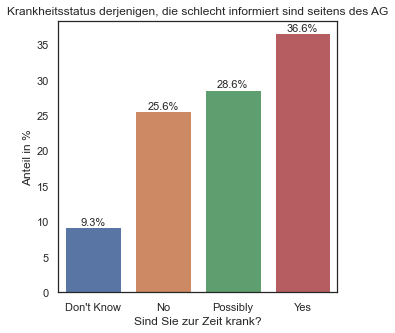

In [71]:
plt.subplots(figsize=(5, 5))
only_bad_barplot = sns.barplot(x = 'Has_disorder', y = '%', data = only_bad_by_has_disorder)
for container in only_bad_barplot.containers:
   only_bad_barplot.bar_label(container, fmt='%.1f%%', fontsize=11)
only_bad_barplot.set_xlabel("Sind Sie zur Zeit krank?")
only_bad_barplot.set_ylabel("Anteil in %")
only_bad_barplot.set_title("Krankheitsstatus derjenigen, die schlecht informiert sind seitens des AG")


In [72]:
only_middle_by_has_disorder['%'] = append_count_in_percent(only_middle_by_has_disorder)

only_middle_by_has_disorder

,Has_disorder,Count,%
0,Don't Know,49,6.853147
1,No,231,32.307692
2,Possibly,152,21.258741
3,Yes,283,39.580420


Text(0.5, 1.0, 'Krankheitsstatus derjenigen, die durchscnittlich informiert sind seitens des AG')

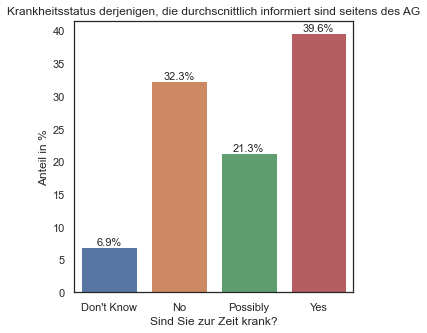

In [73]:
plt.subplots(figsize=(5, 5))
only_middle_barplot = sns.barplot(x = 'Has_disorder', y = '%', data = only_middle_by_has_disorder)
for container in only_middle_barplot.containers:
   only_middle_barplot.bar_label(container, fmt='%.1f%%', fontsize=11)
   only_middle_barplot.set_xlabel("Sind Sie zur Zeit krank?")
only_middle_barplot.set_ylabel("Anteil in %")
only_middle_barplot.set_title("Krankheitsstatus derjenigen, die durchscnittlich informiert sind seitens des AG")

In [74]:
only_good_by_has_disorder['%'] = append_count_in_percent(only_good_by_has_disorder)
only_good_by_has_disorder


,Has_disorder,Count,%
0,Don't Know,17,4.473684
1,No,113,29.736842
2,Possibly,51,13.421053
3,Yes,199,52.368421


Text(0.5, 1.0, 'Krankheitsstatus derjenigen, die gut bis sehr gut informiert sind seitens des AG')

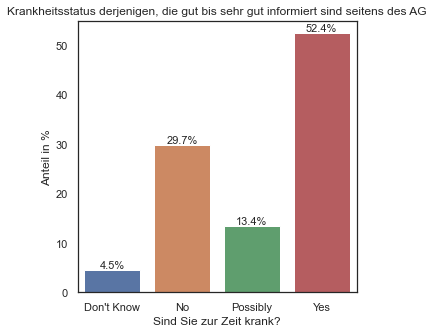

In [75]:
plt.subplots(figsize=(5, 5))
only_good_barplot = sns.barplot(x = 'Has_disorder', y = '%', data = only_good_by_has_disorder)
for container in only_good_barplot.containers:
   only_good_barplot.bar_label(container, fmt='%.1f%%', fontsize=11)
   only_good_barplot.set_xlabel("Sind Sie zur Zeit krank?")
only_good_barplot.set_ylabel("Anteil in %")
only_good_barplot.set_title("Krankheitsstatus derjenigen, die gut bis sehr gut informiert sind seitens des AG")

### Die Position ist auschlaggebend für die mentale Gesundheit

In [76]:

work_position = q117.copy()
work_position1 = work_position.drop('Year', axis=1)
work_position12 = work_position1.drop('QuestionID', axis=1)
position_health_status = pd.merge(work_position12, q33, on='UserID', how='inner')
position_health_status1 = position_health_status.drop('Year', axis=1)
position_health_status12 = position_health_status1.drop('QuestionID', axis=1)
position_health_status12_group = position_health_status12.groupby(['Has_disorder', 'work_position']).size().reset_index(name='Count')

print(position_health_status12_group)


   Has_disorder            work_position  Count
0            No       Back-end Developer     40
1            No                 Designer      5
2            No  Dev Evangelist/Advocate      5
3            No          DevOps/SysAdmin     22
4            No     Executive Leadership      8
5            No      Front-end Developer     38
6            No          One-person shop      6
7            No                    Other     10
8            No     Supervisor/Team Lead     24
9            No                  Support     19
10     Possibly       Back-end Developer     29
11     Possibly                 Designer      4
12     Possibly  Dev Evangelist/Advocate      2
13     Possibly          DevOps/SysAdmin     18
14     Possibly     Executive Leadership      1
15     Possibly      Front-end Developer     21
16     Possibly          One-person shop      2
17     Possibly                    Other     11
18     Possibly     Supervisor/Team Lead     13
19     Possibly                  Support

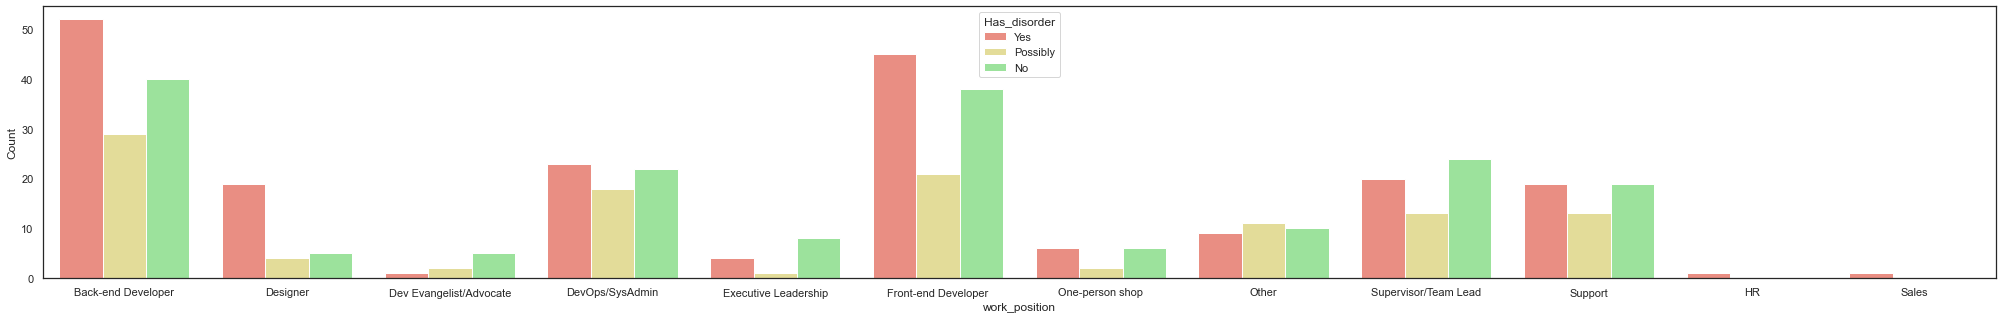

In [77]:
plt.subplots(figsize=(35, 5))
has_disorder_barplot = sns.barplot(x = 'work_position', y = 'Count', hue = 'Has_disorder', data = position_health_status12_group, \
    hue_order=['Yes', 'Possibly', 'No'], palette=['salmon', 'khaki', 'lightgreen'])

In [78]:
Group_by_work_position = work_position.groupby('work_position').size().reset_index(name='Count')

### Wenn die Befragten in der Tech eine Behandlung gegen psychische Erkrankungen bekommen wirkt sich das subjekiv positiv auf ihre Arbeitsleistung aus.

In [79]:
# merge data q33_q48_q49 and clean up the table and cut it in two new ones
q33_q48 = pd.merge(q33,q48, on='UserID', how='inner')
q33_q48_q49 = pd.merge(q33_q48,q49, on='UserID', how='inner')
treatment = q33_q48_q49.copy(deep=True)
treatment_cleanup = treatment.drop(['Year_x', 'QuestionID_x', 'QuestionID_y', 'Year_y', 'Year'], axis=1)
treatment_cleanup = treatment_cleanup[treatment_cleanup.work_prductivity_by_treatment_yes !='Not applicable to me']
treatment_cleanup = treatment_cleanup[treatment_cleanup.work_prductivity_by_treatment_no !='Not applicable to me']
treatment_cleanup = treatment_cleanup[treatment_cleanup.Has_disorder !='No']
treatment_cleanup = treatment_cleanup[treatment_cleanup.Has_disorder !='Possibly']
treatment_cleanup = treatment_cleanup[treatment_cleanup.Has_disorder !='Don\'t Know']
treatment_cleanup_backup = treatment_cleanup.copy(deep=True)
treatment_clean_yes = treatment_cleanup.groupby(['work_prductivity_by_treatment_yes']).size().reset_index(name='Count')
treatment_clean_no = treatment_cleanup_backup.groupby(['work_prductivity_by_treatment_no']).size().reset_index(name='Count')
treatment_clean_yes = treatment_clean_yes.reindex(index = [1, 3, 2, 0])
treatment_clean_yes


,work_prductivity_by_treatment_yes,Count
1,Often,62
3,Sometimes,266
2,Rarely,232
0,Never,40


Text(0.5, 1.0, 'Menschen, während erfolgreicher Bahndlung und wie oft die Krankheit ihren Arbeitsalltag stört')

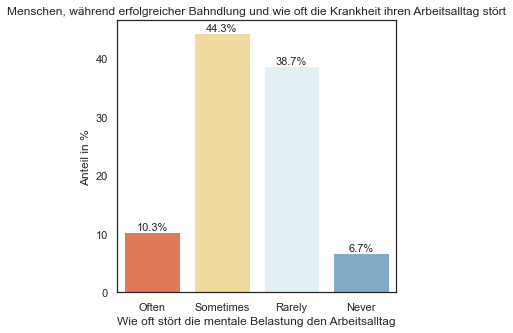

In [80]:
plt.subplots(figsize=(5, 5))
treatment_clean_yes['%'] = append_count_in_percent(treatment_clean_yes)
treatment_clean_yes_barplot = sns.barplot(x = 'work_prductivity_by_treatment_yes', y = '%', data = treatment_clean_yes, palette = 'RdYlBu')
for container in treatment_clean_yes_barplot.containers:
   treatment_clean_yes_barplot.bar_label(container, fmt='%.1f%%', fontsize=11)  


treatment_clean_yes_barplot.set_xlabel("Wie oft stört die mentale Belastung den Arbeitsalltag")
treatment_clean_yes_barplot.set_ylabel("Anteil in %")
treatment_clean_yes_barplot.set_title("Menschen, während erfolgreicher Bahndlung und wie oft die Krankheit ihren Arbeitsalltag stört")


In [81]:
# table of people telling how often they think their metal health problem leads to problems at work who are not treated effectivly
treatment_clean_no = treatment_clean_no.reindex(index = [0, 2, 1])
treatment_clean_no

,work_prductivity_by_treatment_no,Count
0,Often,448
2,Sometimes,132
1,Rarely,20


Text(0.5, 1.0, 'Menschen, ohne erfolgreiche Bahndlung und wie oft die Krankheit ihren Arbeitsalltag stört')

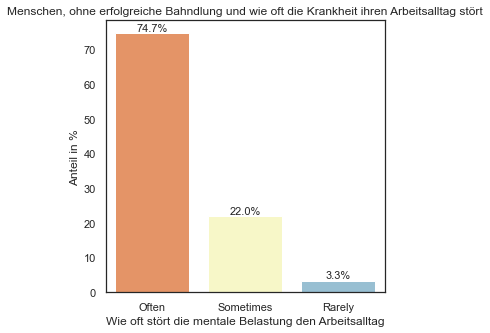

In [82]:
treatment_clean_no['%'] = append_count_in_percent(treatment_clean_no)
plt.subplots(figsize=(5, 5))
treatment_clean_no_barplot = sns.barplot(x = 'work_prductivity_by_treatment_no', y = '%', data = treatment_clean_no, palette = 'RdYlBu')
for container in treatment_clean_no_barplot.containers:
  treatment_clean_no_barplot.bar_label(container, fmt='%.1f%%', fontsize=11)

treatment_clean_no_barplot.set_xlabel("Wie oft stört die mentale Belastung den Arbeitsalltag")
treatment_clean_no_barplot.set_ylabel("Anteil in %")
treatment_clean_no_barplot.set_title("Menschen, ohne erfolgreiche Bahndlung und wie oft die Krankheit ihren Arbeitsalltag stört")